First I import the libraries to use

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Read the .csv file as a pandas dataframe

In [24]:
properties_train = pd.read_csv('Datathon/properties_colombia_train.csv', index_col=False)

In [3]:
properties_train.head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


Here I see the percentage of NaN values in each column

In [5]:
properties_train.isnull().sum()/len(properties_train)*100

Unnamed: 0          0.000000
id                  0.000000
ad_type             0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                25.056062
lon                25.056062
l1                  0.000000
l2                  0.000000
l3                  5.584437
l4                 77.035065
l5                 86.125468
l6                 96.523900
rooms              86.060674
bedrooms           79.486102
bathrooms          20.795853
surface_total      96.469737
surface_covered    95.038193
price               0.031891
currency            0.033916
price_period       81.791353
title               0.000506
description         0.061251
property_type       0.000000
operation_type      0.000000
geometry            0.000000
dtype: float64

Since there are some columns with many missing values, I decided to dispose of them

In [25]:
properties_train.drop(columns=['Unnamed: 0', 'id', 'l6', 'l5', 'l4','surface_total', 'surface_covered', 'price_period'], inplace=True)
properties_train.drop(columns=['title', 'start_date', 'end_date', 'created_on'], inplace=True) # I drop these columns as well because they are just descriptions and dates no needed for my analysis
properties_train.drop(columns=['l1', 'ad_type', 'currency', 'operation_type'], inplace=True) # These columns have the same values in each entry, so they dont't give me much information

Now I'll work the NaN values from the remaining columns

In [7]:
properties_train.isnull().sum()/len(properties_train)*100

lat              25.056062
lon              25.056062
l2                0.000000
l3                5.584437
rooms            86.060674
bedrooms         79.486102
bathrooms        20.795853
price             0.031891
description       0.061251
property_type     0.000000
geometry          0.000000
dtype: float64

First I tried to make a function that returns the city or other location from the coordenates, but when trying to apply to the dataframe it took too long, so I decided to dispose of the coordenates columns as well

In [8]:
def get_location(long_lat, place): # function that returns the location from a list with latitude and longitude
    country_city_state_neighbourhood = []
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse(long_lat[1]+","+long_lat[0])
    address = location.raw['address']
    if place == 'country':
        country = address.get('country', '')
        country_city_state_neighbourhood = country
        return country_city_state_neighbourhood
    elif place == 'state':
        state = address.get('state', '')
        country_city_state_neighbourhood = state
        return country_city_state_neighbourhood
    elif place == 'city':
        city = address.get('city', '')
        country_city_state_neighbourhood = city
        return country_city_state_neighbourhood
    elif place == 'neighbourhood':
        neighbourhood = address.get('neighbourhood')
        country_city_state_neighbourhood = neighbourhood
    return country_city_state_neighbourhood

In [26]:
properties_train.drop(columns=['lat', 'lon', 'geometry'], inplace=True)

Since I intend to keep the l3 column containing the city of the property, I'll be dropping the entries with that missing data as it's just a %5 of values

In [27]:
no_city = properties_train[properties_train.l3.isna()].index
properties_train.drop(no_city, inplace=True)

The same goes for the price column, wich has less missing values, and I must keep it since I need it to create my target label

In [28]:
no_price = properties_train[properties_train.price.isna()].index
properties_train.drop(no_price, inplace=True)

The room, bathroom and bedroom columns all have missing values, but the rooms field can be filled with the values from the other two columns

In [29]:
# So for that I'll fill the bathroom and bedroom columns knowing trough studying the dataframe that those NaN values equal 0
properties_train.bathrooms.fillna(0.0, inplace=True)
properties_train.bedrooms.fillna(0.0, inplace=True)
properties_train.rooms.fillna(properties_train.bathrooms + properties_train.bedrooms, inplace=True) # So now I can fill the room column with the sum of the other two columns

Now I have my dataframe without NaN values

In [15]:
properties_train.isnull().sum()/len(properties_train)*100

l2               0.000000
l3               0.000000
rooms            0.000000
bedrooms         0.000000
bathrooms        0.000000
price            0.000000
description      0.048268
property_type    0.000000
dtype: float64

I create my label to predict, that being if the property is considered expensive or not

In [16]:
properties_train.price.mean() # I use the mean of the column price as the delimiter for the categorical labels

641948436.0207285

In [30]:
price_condition = [(properties_train.price > properties_train.price.mean()),
                (properties_train.price < properties_train.price.mean())]

price_labels = ['expensive','cheap']
properties_train['label'] = np.select(price_condition, price_labels) # I create the label column with the categorical values

In [18]:
properties_train.head(3)

,l2,l3,rooms,bedrooms,bathrooms,price,description,property_type,label
0,Antioquia,Medellín,8.0,4.0,4.0,9.000000e+09,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,expensive
1,Cundinamarca,Bogotá D.C,5.0,3.0,2.0,6.250000e+08,Venta apartamento en piso 16 con vista exterio...,Apartamento,cheap
2,Cundinamarca,Bogotá D.C,2.0,0.0,2.0,4.200000e+08,Al entrar a este bonito apartamento interior e...,Casa,cheap


In [19]:
properties_train.label.unique() # I check if there is another value that shouldn't be there

array(['expensive', 'cheap'], dtype=object)

In [31]:
properties_train.drop(columns='price', inplace=True) # Now I can drop the price column

Now I want to encode some of the columns including my target label

In [32]:
label_encoder = LabelEncoder() # I will be using LabelEncoder from the Sklearn library
properties_train.label = label_encoder.fit_transform(properties_train.label)
properties_train.l2 = label_encoder.fit_transform(properties_train.l2)
properties_train.l3 = label_encoder.fit_transform(properties_train.l3)
properties_train.property_type = label_encoder.fit_transform(properties_train.property_type)

I use a correlation heatmap to see wich features have the most correlation

C:\Users\Auli\AppData\Local\Temp\ipykernel_12296\2540964352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = properties_train.corr()


<AxesSubplot: >

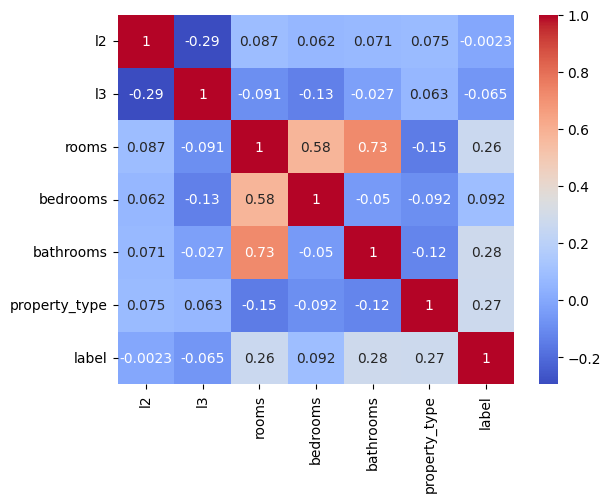

In [22]:
corr = properties_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Seems like the features with the most correlation to the target label are rooms, bathrooms and property_type, but since rooms and bathrooms have a strong correlation with eachother, I'll only keep the rooms column

In [33]:
properties_train = properties_train[['rooms', 'property_type', 'label']]

I import the model to use, in this case a Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier # I import the Decision Tree from the sklearn library
DesTree = DecisionTreeClassifier() 
X_train, y_train = properties_train[['rooms', 'property_type']], properties_train.label # I separate the data in variables by features and label
DesTree.fit(X_train, y_train) # I train the model with the train data

DecisionTreeClassifier()

Now I need the test data from another Dataset

In [41]:
properties_test = pd.read_csv('Datathon/properties_colombia_test.csv') # I need to apply to this dataframe the same transformations I did to the properties_train dataframe

In [42]:
properties_test.drop(columns=['Unnamed: 0', 'id', 'l6', 'l5', 'l4','surface_total', 'surface_covered', 'price_period'], inplace=True)
properties_test.drop(columns=['title', 'start_date', 'end_date', 'created_on'], inplace=True) 
properties_test.drop(columns=['l1', 'ad_type', 'currency', 'operation_type'], inplace=True) 
properties_test.drop(columns=['lat', 'lon', 'geometry'], inplace=True)
properties_test.bathrooms.fillna(0.0, inplace=True)
properties_test.bedrooms.fillna(0.0, inplace=True)
properties_test.rooms.fillna(properties_test.bathrooms + properties_test.bedrooms, inplace=True) # I need to fill the NaN values in order to predict with the Decision Tree
properties_test.l2 = label_encoder.fit_transform(properties_test.l2)
properties_test.l3 = label_encoder.fit_transform(properties_test.l3)
properties_test.property_type = label_encoder.fit_transform(properties_test.property_type)

In [43]:
properties_test = properties_test[['rooms', 'property_type']]
X_test = properties_test[['rooms', 'property_type']] # I save the features used in the training in a new test variable

Now I will choose the best hyperparameters for the model

In [53]:
from sklearn.model_selection import RandomizedSearchCV

I indicate wich parameters to evaluate

In [54]:
parameters = {'max_depth' : (3, 5, 7, 9, 10),
              'criterion' : ('gini', 'entropy'),
              'max_features' : ('auto', 'sqrt', 'log2'),
              'min_samples_split' : (2, 4, 6)
              }

In [55]:
RanSe = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions= parameters, cv= 5, verbose=True)

In [56]:
RanSe.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [57]:
RanSe.best_estimator_ # I see wich are the best parameters

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_split=6)

So now with these parameters I can re-build the model

In [58]:
DesTree2 = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=9, 
                                 max_features='log2',
                                 min_samples_split=6)
DesTree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_split=6)

In [61]:
y_pred = DesTree2.predict(X_test) # I save the prediction of my model

I will export the prediction to a csv file

In [48]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_pred.to_csv('Auli3_dt.csv', index=False)